# SCFD Blended Cart-Pole Demo

This notebook reproduces the blended linear + ternary controller discovered via `run/train_cma_scfd.py`.
It loads the learned parameter vector, runs a cart-pole episode, and generates diagnostics/visuals so
the behaviour can be verified independently. Run the notebook from the repository root.

In [1]:
from pathlib import Path
import sys

cwd = Path.cwd().resolve()
candidates = [cwd, *cwd.parents]
for candidate in candidates:
    if (candidate / 'benchmarks').exists():
        REPO_ROOT = candidate
        break
else:
    raise RuntimeError('Could not locate repo root containing benchmarks/')
if str(REPO_ROOT) not in sys.path:
    sys.path.insert(0, str(REPO_ROOT))
REPO_ROOT


WindowsPath('C:/Users/mattt/Documents/012loop/looptronics/scfd_vnext')

In [2]:
import numpy as np
from pathlib import Path
from run.train_cma_scfd import _config_from_vector
from benchmarks.scfd_cartpole import SCFDControllerConfig, SCFDCartPoleController
from IPython.display import display, Markdown, Video, Image


In [3]:
BEST_VECTOR = np.array([5.697177369316428, 1.137469304059812, 2.377897058806167, 0.133910992566840, 5.537741288792289, 1.695737795819666, 1.383044566592719, -0.599684661486451, 0.037449200849656, 0.012745833094041, 0.234694053632558, 0.368446354644569, -0.098467100186198, 7.675882981618045, 0.593372066894766], dtype=np.float32)
cfg = _config_from_vector(SCFDControllerConfig(), BEST_VECTOR)
display(Markdown('**Controller parameters (excerpt):**'))
print('blend_linear_weight =', cfg.blend_linear_weight)
print('blend_ternary_weight =', cfg.blend_ternary_weight)
print('ternary_force_scale =', cfg.ternary_force_scale)
print('ternary_smooth_lambda =', cfg.ternary_smooth_lambda)
cfg.scfd_cfg_path = str(REPO_ROOT / 'cfg/defaults.yaml')


**Controller parameters (excerpt):**

blend_linear_weight = 0.36844635009765625
blend_ternary_weight = 0.0
ternary_force_scale = 7.675882816314697
ternary_smooth_lambda = 0.5933720469474792


In [4]:
controller = SCFDCartPoleController(cfg, rng=np.random.default_rng(0))
episode_metrics = controller.run_episode(steps=5000)
episode_metrics

{'steps': 715,
 'rms_step': 3.697654392453842e-05,
 'action_last': 1.5853590651525218}

In [5]:
out_dir = Path('notebooks') / 'artifacts' / 'blended_quick_demo'
vis = controller.generate_visualization(steps=800, out_dir=out_dir, save_video=True)
vis

MovieWriter ffmpeg unavailable; using Pillow instead.


{'frames': 800,
 'raster': 'notebooks\\artifacts\\blended_quick_demo\\scfd_field_raster.png',
 'rollout': 'notebooks\\artifacts\\blended_quick_demo\\scfd_rollout.npz',
 'video': 'notebooks\\artifacts\\blended_quick_demo\\scfd_cartpole.gif'}

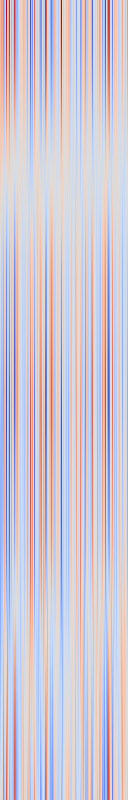

In [6]:
display(Image(filename=vis['raster']))
if vis['video']:
    display(Video(vis['video']))
